# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This dataset represents 17 campaigns over 79354 contacts. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Check on null values
-  Dataset doesn't contain any NAN values. 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

###  Unique value for classfications

Y - client has subscribed to offer
N - Client has not subscribed to offer

In [7]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

### No of contacts and features

Total contacts 41188 having 20 features

In [8]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```
The dataset contains more categorical clien information which needs to be encoded to numerical values so that analysis can be performed. The data set contains two type of information. 1) client demographics information 2)  client touchpoint data

###  Common plot functions

In [9]:
def draw_pie_chart(df,title):
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    data = df['count'].array
    labels = df.index


    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{pct:.1f}%\n({absolute:d} g)"
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                    textprops=dict(color="w"))
    ax.legend(wedges, labels,
            title="Job Type",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(title)

    plt.show()

### Breakdown by Job type

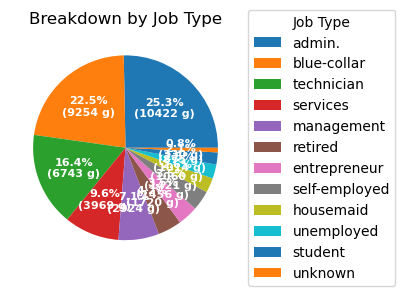

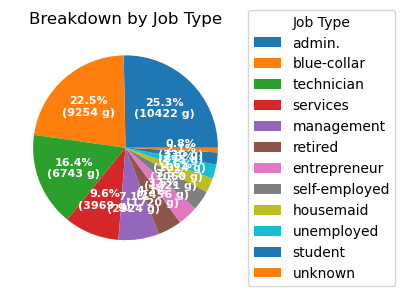

In [10]:
draw_pie_chart(df.value_counts('job').to_frame(),'Breakdown by Job Type')


### Breakdown by Education

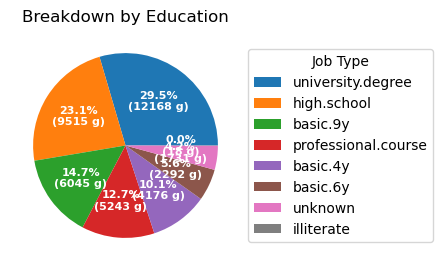

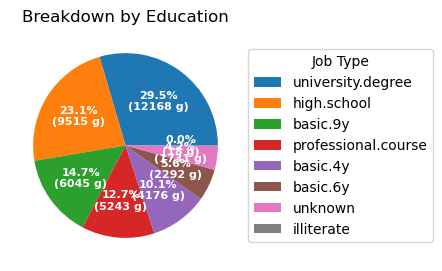

In [11]:
draw_pie_chart(df.value_counts('education').to_frame(),'Breakdown by Education')

### Breakdown by housing ownership
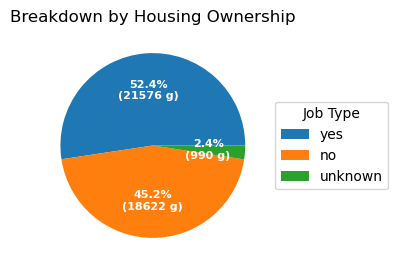

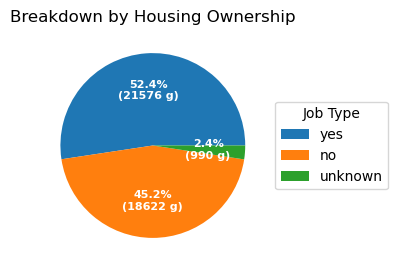

In [12]:
draw_pie_chart(df.value_counts('housing').to_frame(),'Breakdown by Housing Ownership')

### Breakdown by previous campaign outcome

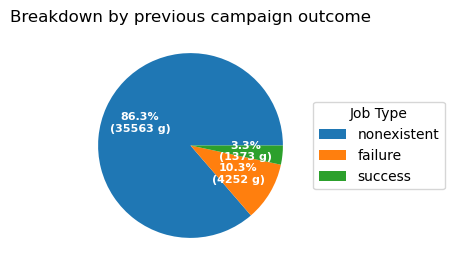

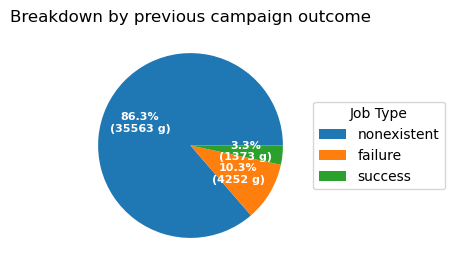

In [13]:
draw_pie_chart(df.value_counts('poutcome').to_frame(),'Breakdown by previous campaign outcome')

### Breakdown by No of contacts performed

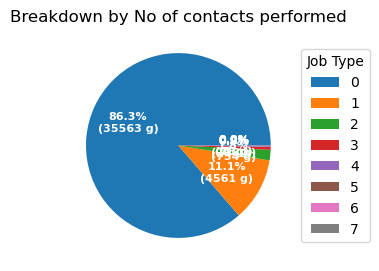

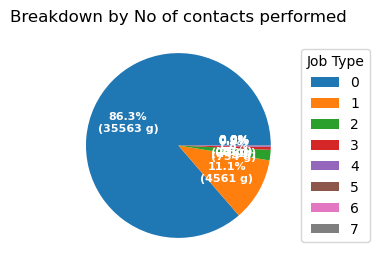

In [14]:
draw_pie_chart(df.value_counts('previous').to_frame(),'Breakdown by No of contacts performed')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective 
below.

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate).

This dataset contains client information as well as campaigns touchpoints and outcome information.  The purpose of this task is to perform various classification model and compare the effiiciency of each model. In turn this classification can help bank target spcific campaigns to specific clients to save the overall campign cost. So, we will execute different clssification models and compare the confusion matrix of each to understand the accuracy of each model. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

We will use LableEncoder library from sklearn to encode entire dataset. 

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [17]:
X_features = df.iloc[:,1:8]  # all rows, all the features and no labels
y_lable = df.iloc[:, 20]  # all rows, label only
#X_features.head()
X_features.info()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(X_features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        41188 non-null  int64
 1   marital    41188 non-null  int64
 2   education  41188 non-null  int64
 3   default    41188 non-null  int64
 4   housing    41188 non-null  int64
 5   loan       41188 non-null  int64
 6   contact    41188 non-null  int64
dtypes: int64(7)
memory usage: 2.2 MB


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features,y_lable,test_size=0.2,random_state=4)




### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

I have used dummyClassifier to established the baseline performance which is 0.8873458288821987.

In [19]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_features, y_lable)
dummy_clf.predict(X_features)
dummy_clf.score(X_features, y_lable)

0.8873458288821987

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from time import process_time

result_df= pd.DataFrame(columns=('Model','Train Accuracy','Test Accracy','Train Time'))

model_LR= LogisticRegression()
start = process_time()
model_LR.fit(X_train,y_train)
end = process_time()
train_time = end-start
y_pred = model_LR.predict(X_test)
train_accuracy = accuracy_score(y_test, y_pred)
print(" Train accuracy=",train_accuracy)

 Train accuracy= 0.8871085214857976


###  Cross validation using KFold

In [21]:
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model_LR, X_features, y_lable, scoring='accuracy', cv=cv, n_jobs=-1)
test_accuracy= mean(scores)
print("Test Accuracy",test_accuracy)



Test Accuracy 0.8873459316427692


### Logistic Regression Confusion matrix

array([[7118,  190],
       [ 560,  370]])

In [22]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[7308,    0],
       [ 930,    0]])

### ROC accuracy of logistic regression is 0.9236685676618934

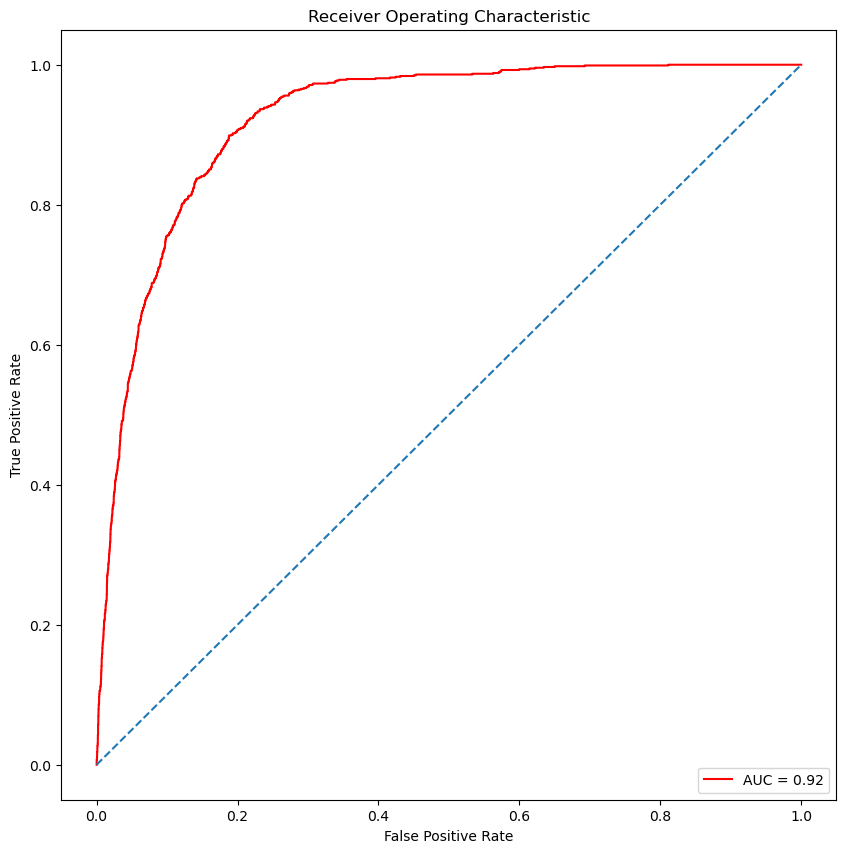

In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

NameError: name 'y_prob' is not defined

In [ ]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Problem 9: Score the Model

What is the accuracy of your model?

-       Model	Train Accuracy	Test Accracy	Train Time
          LR	    0.908958	      0.909221	    2.415581

In [ ]:
result_df.loc[len(result_df.index)] = ['LR',round(train_accuracy*100,2), round(test_accuracy*100,2), train_time]  
result_df

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:


|	Model |	Train Accuracy	| Test Accracy	| Train Time |
| ------- | --------------- | --------------| -----------|
|   LR 	| 88.71	| 88.73	| 0.379202 |
|	KNN	| 88.54	| 88.69	| 0.015654 |
|	SVM	| 88.71	| 88.73	| 2.305266 |
|	DT	| 88.36	| 88.29	| 0.028404 |

### Common method


In [26]:
## Calculate knn accuracy
from sklearn . neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

def calc_knn_acc(xtrain,ytrain,xtest,ytest,n):
    knn_classifier = KNeighborsClassifier (n_neighbors =n)
    start= process_time()
    knn_classifier.fit ( xtrain,np.ravel(ytrain ))
    end = process_time()
    knn_pred = knn_classifier.predict (xtest )
    print("Classification report for {}:\n{}".format(knn_classifier, classification_report(ytest, knn_pred)))
    return knn_classifier, round(accuracy_score(ytest,knn_pred)*100,2), end-start

def calc_SVM_acc(xtrain,ytrain,xtest,ytest):
    svm_clf = svm.SVC(kernel='linear')
    start = process_time()
    svm_clf.fit (xtrain,np.ravel(ytrain))
    end=process_time()
    svm_pred = svm_clf.predict(xtest)
    print("Classification report for {}:\n{}".format(svm_clf, classification_report(ytest, svm_pred)))
    return svm_clf,round(accuracy_score(ytest,svm_pred)*100,2) , end-start

def calc_decision_acc(xtrain,ytrain,xtest,ytest):
    dt_clf= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    start = process_time()
    dt_clf.fit(X_train, y_train)
    end=process_time()
    dt_pred = dt_clf.predict(xtest)
    print("Classification report for {}:\n{}".format(dt_clf, classification_report(ytest, dt_pred)))
    return dt_clf,round(accuracy_score(ytest,dt_pred)*100,2) , end-start

### KNN Classifier

In [ ]:
knn_clf, knn_train_accuracy, train_time = calc_knn_acc(X_train,y_train,X_test,y_test,12)  # Accuracy when K=12

scores = cross_val_score(knn_clf, X_features, y_lable, scoring='accuracy', cv=cv, n_jobs=-1)
knn_test_accuracy= round(mean(scores)*100,2)
print("Knn Test Accuracy",round(knn_test_accuracy*100,2))

result_df.loc[len(result_df.index)] = ['KNN',knn_train_accuracy, knn_test_accuracy, train_time]
result_df

### SVM Classifier

In [ ]:
svm_clf, svm_train_accuracy, train_time = calc_SVM_acc(X_train,y_train,X_test,y_test) 

scores = cross_val_score(svm_clf, X_features, y_lable, scoring='accuracy', cv=cv, n_jobs=-1)
svm_test_accuracy= round(mean(scores)*100,2)
print("SVM Test Accuracy",round(svm_test_accuracy*100,2))

result_df.loc[len(result_df.index)] = ['SVM',svm_train_accuracy, svm_test_accuracy, train_time]
result_df

###  DecisionTree Classifier

In [ ]:
dt_clf, dt_train_accuracy, train_time = calc_decision_acc(X_train,y_train,X_test,y_test) 

scores = cross_val_score(dt_clf, X_features, y_lable, scoring='accuracy', cv=cv, n_jobs=-1)
dt_test_accuracy= round(mean(scores)*100,2)
print("SVM Test Accuracy",round(dt_test_accuracy*100,2))

result_df.loc[len(result_df.index)] = ['DT',dt_train_accuracy, dt_test_accuracy, train_time]
result_df

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### PCA Analysis for feature Engineering

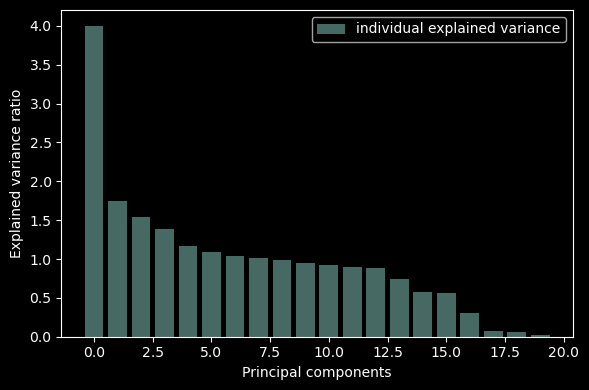

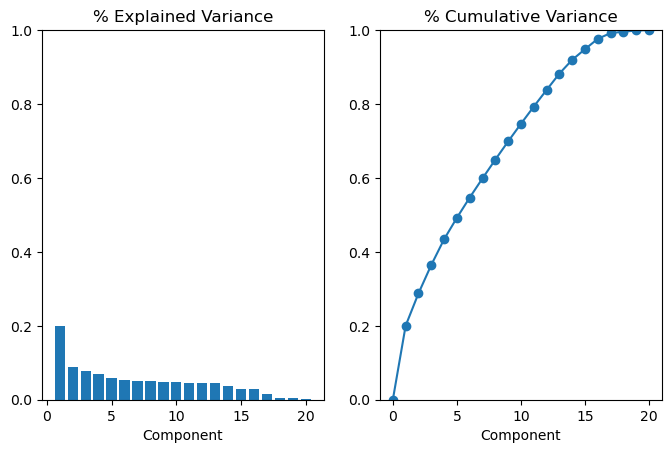

   |---------| ------------ |
   | duration   |       0.064381   |       
      |       nr.employed   |              0.062872   |       
   | emp.var.rate    |            0.044628   |       
   | euribor3m    |               0.041646   |       
   | poutcome   |                 0.032109   |       
   | pdays       |                0.027936   |       
   | cons.conf.idx    |           0.026440   |       
   | cons.price.idx    |          0.019259   |       
   | previous     |               0.018524   |       
   | contact    |                 0.011845   |       
   | month     |                  0.009613   |       
   | job     |                    0.006593   |       
   | default    |                 0.005946   |       
   | age      |                   0.005715   |       
   | education    |               0.002711   |       
   | marital         |            0.002625   |       
   | day_of_week     |            0.000000   |       
   | loan      |                  0.000000   |       
   | housing     |                0.000000   |       
   | campaign     |               0.000000   |       
Name: MI Scores, dtype: float64

Looking at above MI scores, duration, nr.employed,emp.var.rate,euribo3m,poutcome,pdays,consumer confidance, previous campaign outcome, contact has more influence on outcome of the campign.  Age, education,days_of_week etc has least positive influence on campaign outcome. 

### Perform PCA for feature engineering

### Logistic Regression Confusion matrix

array([[7118,  190],
       [ 560,  370]])

### Logistic Regression Confusion matrix

array([[7118,  190],
       [ 560,  370]])

#### Common Method for PCA

In [ ]:
from sklearn.feature_selection import mutual_info_regression
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
from sklearn.decomposition import PCA
X_all = df.iloc[:,0:20]  # all rows, all the features and no labels
y_target = df.iloc[:, 20]  # all rows, label only


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_all_scaled = sc.fit_transform(X_all)

X_pca = PCA()
X_pca.fit_transform(X_all_scaled)


In [ ]:
covariance=X_pca.get_covariance()

In [ ]:
explained_variance=X_pca.explained_variance_
explained_variance


component_names = [f"PC{i+1}" for i in range(20)]
loadings = pd.DataFrame(
    X_pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_all.columns,  # and the rows are the original features
)
loadings

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(20), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
plot_variance(X_pca)

In [ ]:
mi_scores = make_mi_scores(X_all, y_target, discrete_features=False)
mi_scores

### Tuning classification models using hyperparameters

output of hyper parameter tuning

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Model</th>
      <th>Train Accuracy</th>
      <th>Test Accracy</th>
      <th>Train Time</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LR</td>
      <td>90.81</td>
      <td>91.02</td>
      <td>2.058776</td>
    </tr>
    <tr>
      <th>1</th>
      <td>KNN</td>
      <td>90.63</td>
      <td>88.68</td>
      <td>0.018194</td>
    </tr>
    <tr>
      <th>2</th>
      <td>SVM_WO_POLY</td>
      <td>88.78</td>
      <td>88.76</td>
      <td>33.226872</td>
    </tr>
    <tr>
      <th>3</th>
      <td>SVM_WTH_POLY</td>
      <td>90.74</td>
      <td>91.00</td>
      <td>580.443674</td>
    </tr>
  </tbody>
</table>
</div>

#### Create engineered features set based on PCA

In [27]:
tuned_df = df.drop(columns=['campaign','housing','loan','day_of_week','marital','education','age','default','job','month'])

X_tune_feature= tuned_df.iloc[:,0:10]
y_tune_target= tuned_df.iloc[:,10]
y_tune_target

sc = StandardScaler()
X_features_tune_scaled = sc.fit_transform(X_tune_feature)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tune_feature,y_tune_target,test_size=0.2,random_state=4)

#### Logistic Regression Tuning

In [29]:
tune_result_df= pd.DataFrame(columns=('Model','Train Accuracy','Test Accracy','Train Time'))

lr_reg= LogisticRegression()
start = process_time()
lr_reg.fit(X_train,y_train)
end = process_time()
train_time = end-start
y_pred = lr_reg.predict(X_test)
train_accuracy = accuracy_score(y_test, y_pred)
print(" Train accuracy=",train_accuracy)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lr_reg, X_tune_feature, y_tune_target, scoring='accuracy', cv=cv, n_jobs=-1)
test_accuracy= mean(scores)
print("Test Accuracy",test_accuracy)


/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Train accuracy= 0.9081087642631707
Test Accuracy 0.9102407722566385


/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [30]:
tune_result_df.loc[len(tune_result_df.index)] = ['LR',round(train_accuracy*100,2), round(test_accuracy*100,2), train_time]  
tune_result_df

,Model,Train Accuracy,Test Accracy,Train Time
0,LR,90.81,91.02,2.058776


###  KNN Tuning

-   Best KNN Hyperparameters
    -   Best leaf_size: 2
    -   Best p: 1
    -   Best n_neighbors: 13

In [31]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = [2]
n_neighbors = [13]
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
start= process_time()
best_model = clf.fit(X_train,y_train)
end = process_time()
knn_train_time = end -start
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])



Best leaf_size: 2
Best p: 1
Best n_neighbors: 13


In [32]:
knn_clf, knn_train_accuracy, train_time = calc_knn_acc(X_train,y_train,X_test,y_test,13)  # Accuracy when K=12

scores = cross_val_score(knn_clf, X_features, y_lable, scoring='accuracy', cv=cv, n_jobs=-1)
knn_test_accuracy= round(mean(scores)*100,2)
print("Knn Test Accuracy",round(knn_test_accuracy*100,2))

tune_result_df.loc[len(tune_result_df.index)] = ['KNN',knn_train_accuracy, knn_test_accuracy, train_time]
tune_result_df


Classification report for KNeighborsClassifier(n_neighbors=13):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7308
           1       0.62      0.45      0.52       930

    accuracy                           0.91      8238
   macro avg       0.77      0.71      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Knn Test Accuracy 8868.0


,Model,Train Accuracy,Test Accracy,Train Time
0,LR,90.81,91.02,2.058776
1,KNN,90.63,88.68,0.018194


### SVM Tuning without polynomial kernel

In [33]:
tuned_parameters = {
 #'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf','linear'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVC
#svm_model= SVC()

#model_svm = GridSearchCV(svm_model, tuned_parameters,refit = True, verbose = 3)

#model_svm.fit(X_train, y_train)
#print(model_svm.best_score_)

The Best SVM hyber parameters are C=1, gamma=0.1, kernel=rbf;, score=0.887 total time=   4.5s. SVM takes so much time to execute. I have manually capture this parameters becasue it took too much time to complete. 

In [ ]:
print(model_svm.best_params_)

In [34]:
svm_md= SVC(kernel="rbf", C=1, gamma=0.1)
start=process_time()
svm_md.fit(X_train,y_train)
end=process_time()
y_pred= svm_md.predict(X_test)
svm_acc_train = metrics.accuracy_score(y_pred,y_test)
print(svm_acc_train)

tune_result_df.loc[len(tune_result_df.index)] = ['SVM_WO_POLY',88.78,88.76, start-end]
tune_result_df

0.8877154649186696


,Model,Train Accuracy,Test Accracy,Train Time
0,LR,90.81,91.02,2.058776
1,KNN,90.63,88.68,0.018194
2,SVM_WO_POLY,88.78,88.76,-33.226872


#### SVM Tuning with Polynomial

In [35]:
tuned_parameters = {
 'degree': [2,3] , 'C':[1,10,100] , 'kernel':['poly']
    }
svm_oly= SVC()
model_svm1 = RandomizedSearchCV(svm_oly, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,verbose=3)
start = process_time()
model_svm1.fit(X_train, y_train)
end = process_time()
print(model_svm1.best_score_)


y_pred1= model_svm1.predict(X_test)
svm_acc_train1 = metrics.accuracy_score(y_pred1,y_test)
print(svm_acc_train1)



/Users/hetalpatel/miniconda3/envs/aiml/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .......C=1, degree=2, kernel=poly;, score=0.892 total time=   3.7s
[CV 2/10] END .......C=1, degree=2, kernel=poly;, score=0.896 total time=   3.3s
[CV 3/10] END .......C=1, degree=2, kernel=poly;, score=0.894 total time=   3.3s
[CV 4/10] END .......C=1, degree=2, kernel=poly;, score=0.893 total time=   3.5s
[CV 5/10] END .......C=1, degree=2, kernel=poly;, score=0.899 total time=   3.5s
[CV 6/10] END .......C=1, degree=2, kernel=poly;, score=0.897 total time=   3.4s
[CV 7/10] END .......C=1, degree=2, kernel=poly;, score=0.894 total time=   3.4s
[CV 8/10] END .......C=1, degree=2, kernel=poly;, score=0.901 total time=   3.4s
[CV 9/10] END .......C=1, degree=2, kernel=poly;, score=0.890 total time=   3.6s
[CV 10/10] END ......C=1, degree=2, kernel=poly;, score=0.893 total time=   3.3s
[CV 1/10] END .......C=1, degree=3, kernel=poly;, score=0.890 total time=   5.6s
[CV 2/10] END .......C=1, degree=3, kernel=poly;

In [37]:
tune_result_df.loc[len(tune_result_df.index)] = ['SVM_WTH_POLY',90.74,91.00, start-end]
tune_result_df

,Model,Train Accuracy,Test Accracy,Train Time
0,LR,90.81,91.02,2.058776
1,KNN,90.63,88.68,0.018194
2,SVM_WO_POLY,88.78,88.76,-33.226872
3,SVM_WTH_POLY,90.74,91.00,-580.443674


##### Questions